In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from kneed import KneeLocator
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set()

In [3]:
data = pd.read_csv("data.csv")
data.head()

,name,artist,track_URI,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,playlist
0,...Ready For It?,Taylor Swift,spotify:track:7zgqtptZvhf8GEmdsM2vp2,0.0665,0.615,0.779,0.000000,0.1550,-6.454,0.1350,160.000,0.453,The Longest Playlist on Spotify® (Official)
1,Life Changes,Thomas Rhett,spotify:track:4Vxu50qVrQcycjRyJQaZLC,0.1000,0.687,0.845,0.000000,0.0452,-4.370,0.0576,87.972,0.809,The Longest Playlist on Spotify® (Official)
2,24K Magic,Bruno Mars,spotify:track:6b8Be6ljOzmkOmFslEb23P,0.0340,0.818,0.803,0.000000,0.1530,-4.282,0.0797,106.970,0.632,The Longest Playlist on Spotify® (Official)
3,Galway Girl,Ed Sheeran,spotify:track:0afhq8XCExXpqazXczTSve,0.0735,0.624,0.876,0.000000,0.3270,-3.374,0.1000,99.943,0.781,The Longest Playlist on Spotify® (Official)
4,Photograph,Ed Sheeran,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,0.6070,0.614,0.379,0.000464,0.0986,-10.480,0.0476,107.989,0.201,The Longest Playlist on Spotify® (Official)


In [3]:
data.shape

(12138, 13)

In [4]:
data.isna().sum()

name                2
artist              2
track_URI           0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
playlist            0
dtype: int64

In [5]:
for i in data['track_URI'].value_counts():
    if i!=1:
        print(i)

In [6]:
data['artist'].value_counts()

Taylor Swift         155
Lacuna Coil           73
Charlie Brown         70
The Neighbourhood     65
Flyleaf               54
                    ... 
Phantogram             1
Eric Amarillo          1
James Hersey           1
Dawa                   1
girl in red            1
Name: artist, Length: 4111, dtype: int64

In [7]:
data.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,12138.000000,12138.000000,12138.000000,12138.000000,12138.000000,12138.000000,12138.000000,12138.000000,12138.000000
mean,0.249016,0.567235,0.645816,0.105665,0.186278,-7.794664,0.068722,120.496019,0.461992
std,0.299363,0.163812,0.232343,0.254477,0.155873,4.419630,0.072007,28.049141,0.246406
min,0.000000,0.000000,0.000000,0.000000,0.000000,-53.436000,0.000000,0.000000,0.000000
25%,0.014100,0.465000,0.489000,0.000000,0.095000,-9.347750,0.034100,99.979000,0.264000
50%,0.101000,0.579000,0.691000,0.000046,0.122000,-6.631000,0.044200,119.998500,0.451000
75%,0.419000,0.686000,0.832000,0.011400,0.227000,-4.921000,0.069700,137.911750,0.655000
max,0.995000,0.980000,1.000000,0.999000,0.988000,-0.276000,0.957000,240.107000,0.990000


C:\Users\prana\AppData\Local\Temp\ipykernel_11140\1333459145.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap = "coolwarm")


<AxesSubplot: >

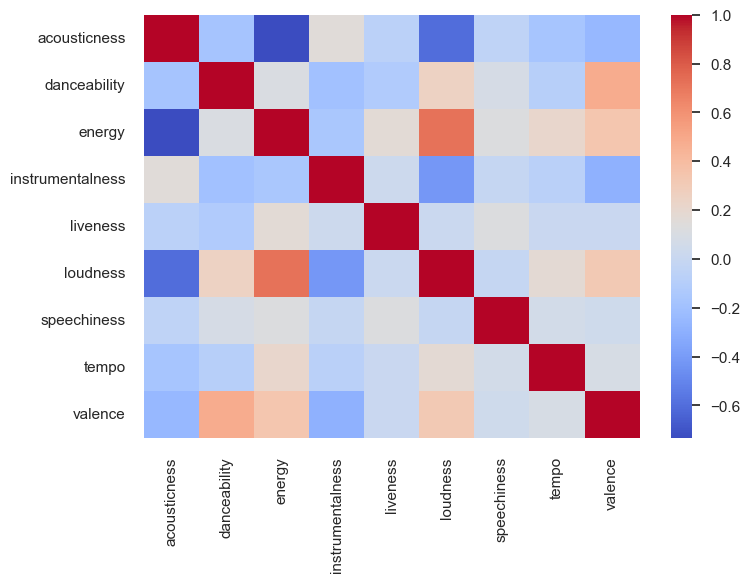

In [8]:
sns.heatmap(data.corr(), cmap = "coolwarm")

- The above heat map shows how strongly different numerical data correlates. The deep red shows strong positive relationships and the deep blue shows strong negative relationships. Some interesting correlations deserve a few comments.

- In another unsurprising trend, loudness correlates with energy. Intuitively, high energy songs radiate intensity, which often comes with loudness.

- Acousticness shares a few interesting negative relationships. Its inverse relationship with energy and loudness captures the idea of how most people image ballads.


## Principal Component Analysis (PCA)

In [4]:
df = data.copy()
non_features = ['name', 'artist', 'track_URI', 'playlist']
track_info = df[non_features]
df_X = df.drop(columns=non_features)
df_X.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.0665,0.615,0.779,0.000000,0.1550,-6.454,0.1350,160.000,0.453
1,0.1000,0.687,0.845,0.000000,0.0452,-4.370,0.0576,87.972,0.809
2,0.0340,0.818,0.803,0.000000,0.1530,-4.282,0.0797,106.970,0.632
3,0.0735,0.624,0.876,0.000000,0.3270,-3.374,0.1000,99.943,0.781
4,0.6070,0.614,0.379,0.000464,0.0986,-10.480,0.0476,107.989,0.201


In [5]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df_X)

In [6]:
pca = PCA()
pca.fit(X_std);

In [7]:
# The attribute shows how much variance is explained by each of the nine features
evr = pca.explained_variance_ratio_
evr

array([0.3215915 , 0.15447604, 0.12258147, 0.10627117, 0.09758425,
       0.08784394, 0.05322885, 0.03783722, 0.01858558])

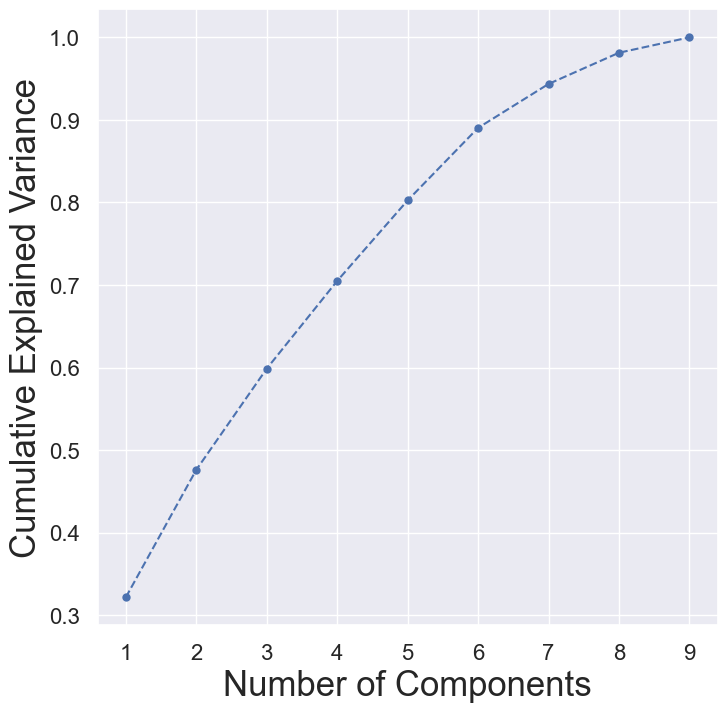

In [8]:
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, len(df_X.columns)+1), evr.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components', fontsize=25)
plt.ylabel('Cumulative Explained Variance',fontsize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig = plt.savefig("./visualizations/cumulative_variance_plot.png")
plt.show()

In [10]:
for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.80:
        n_comps = i + 1
        break
print("Number of components:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Number of components: 5


## K-Means Clustering

Finding the elbow point of the WCSS (within cluster sum of squares) curve using the YellowBrick `KElbowVisualizer`

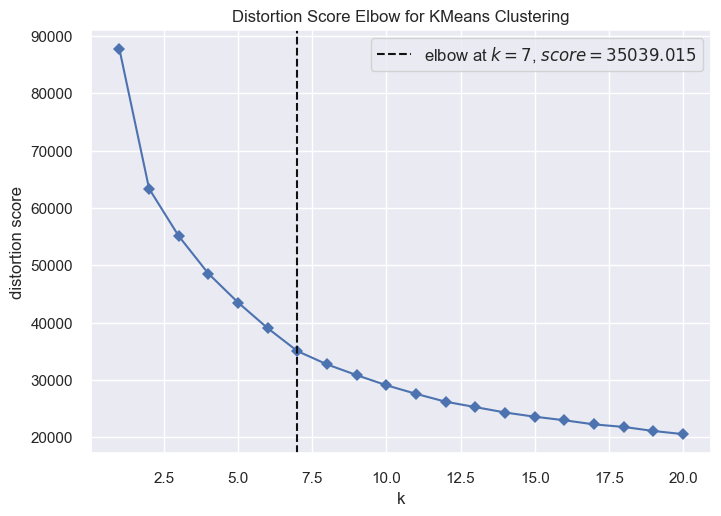

Optimal number of clusters: 7


In [19]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), k=(1,21), timings=False)
visualizer.fit(scores_pca)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

Finding the elbow point of the WCSS (within cluster sum of squares) curve using the kneed `KneeLocator`

In [12]:
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)

Optimal number of clusters 7


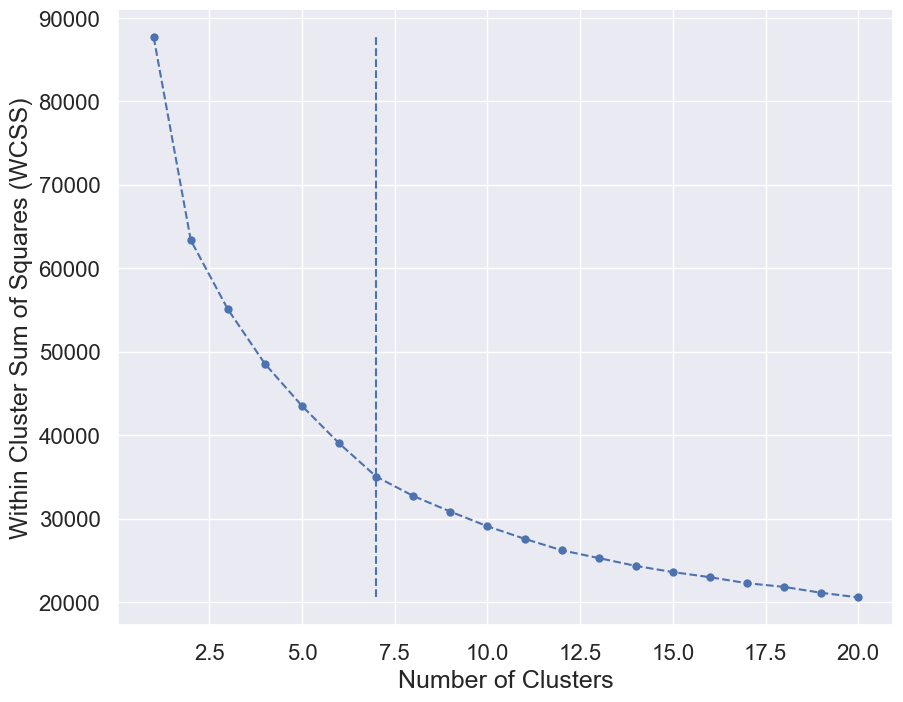

In [13]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("./visualizations/num_clusters.png")
plt.show()

In [14]:
kmeans_pca = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

## Analysis and Visualization

In [15]:
df_seg_pca_kmeans = pd.concat([df_X.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Component 1,Component 2,Component 3,Component 4,Component 5,Cluster
0,0.0665,0.615,0.779,0.000000,0.1550,-6.454,0.1350,160.000,0.453,-1.169497,0.510848,0.199257,1.375003,0.322071,0
1,0.1000,0.687,0.845,0.000000,0.0452,-4.370,0.0576,87.972,0.809,-1.583398,-1.435919,-0.109021,-0.854235,0.478229,2
2,0.0340,0.818,0.803,0.000000,0.1530,-4.282,0.0797,106.970,0.632,-1.717857,-1.088344,0.372795,-0.505178,0.395110,2
3,0.0735,0.624,0.876,0.000000,0.3270,-3.374,0.1000,99.943,0.781,-1.869261,-0.140066,0.957690,-0.867016,-0.432026,2
4,0.6070,0.614,0.379,0.000464,0.0986,-10.480,0.0476,107.989,0.201,1.729481,-0.920606,-0.342867,0.188396,-0.413951,3


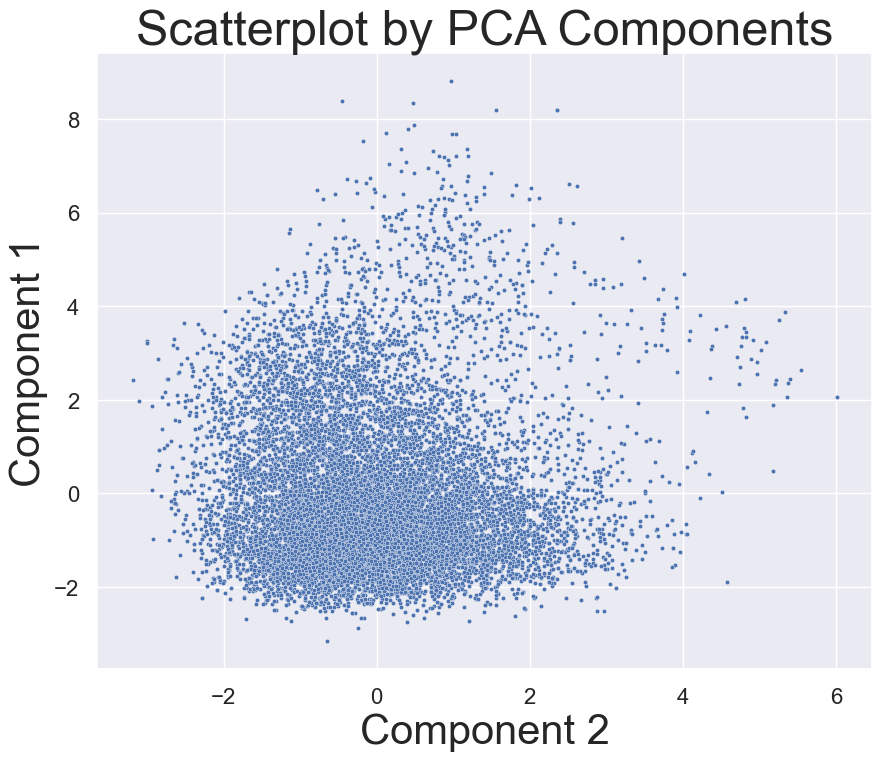

In [17]:

fig = plt.figure(figsize=(10, 8))
sns.scatterplot(df_seg_pca_kmeans,x = 'Component 2', y='Component 1',s=10)
plt.title('Scatterplot by PCA Components', fontsize=35)
plt.xlabel("Component 2", fontsize=30)
plt.ylabel("Component 1", fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
fig.savefig("./visualizations/2-d-pca-components.png")

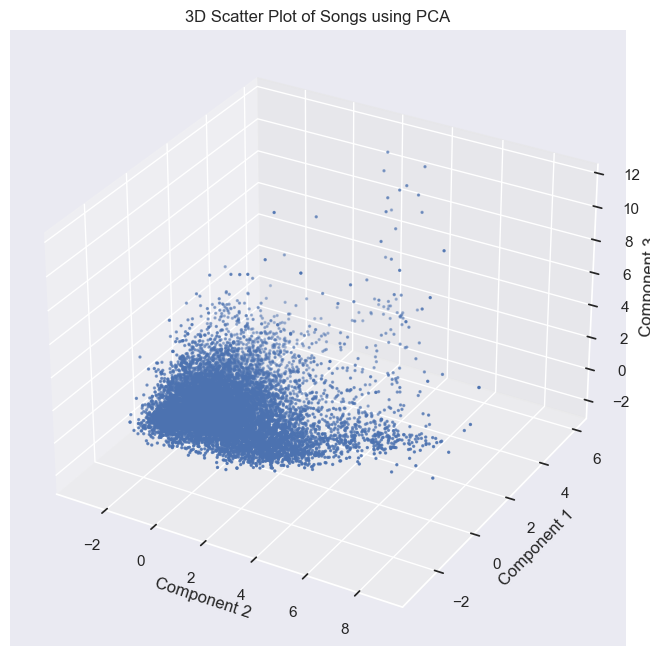

In [25]:
x = df_seg_pca_kmeans['Component 1']
y = df_seg_pca_kmeans['Component 2']
z = df_seg_pca_kmeans['Component 3']
fig = plt.figure(figsize=(8,8))
plt.tight_layout()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,s=2)
ax.set_xlabel("Component 2",fontsize=12)
ax.set_ylabel("Component 1",fontsize=12)
ax.set_zlabel("Component 3",fontsize=12)
ax.set_title("3D Scatter Plot of Songs using PCA")
plt.savefig("visualizations/3-d-pca-components.png")

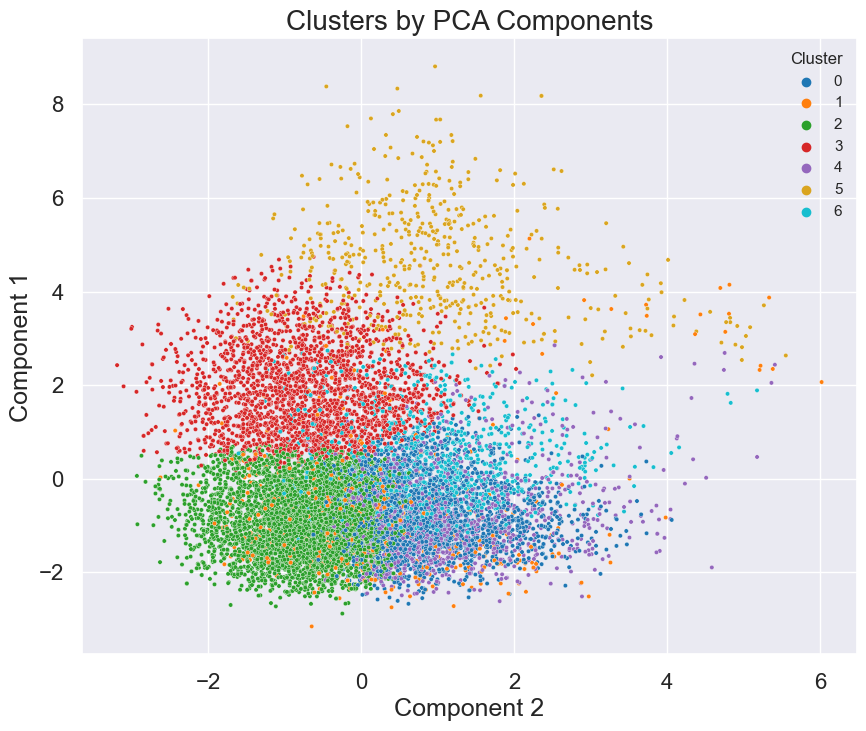

In [21]:
x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(df_seg_pca_kmeans,x = 'Component 2', y='Component 1',s=10, hue='Cluster', palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'goldenrod', 'tab:cyan'])
plt.title('Clusters by PCA Components', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
fig.savefig("./visualizations/clusters-2d-kmeans1.png")

In [20]:
from sklearn.metrics import silhouette_score
silhouette_score(scores_pca, kmeans_pca.labels_)

0.256576946926223

- A score close to 1 means that the clusters are dense and well separated
- A score around 0 indicates overlapping clusters
- A score close to -1 means incorrect clustering / number of clusters

In [86]:
from sklearn import metrics
metrics.calinski_harabasz_score(scores_pca,kmeans_pca.labels_)

3036.7689603710887

In [48]:
df['Cluster'] = df_seg_pca_kmeans['Cluster']
df

,name,artist,track_URI,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,playlist,Cluster
0,...Ready For It?,Taylor Swift,spotify:track:7zgqtptZvhf8GEmdsM2vp2,0.0665,0.615,0.779,0.000000,0.1550,-6.454,0.1350,160.000,0.453,The Longest Playlist on Spotify® (Official),0
1,Life Changes,Thomas Rhett,spotify:track:4Vxu50qVrQcycjRyJQaZLC,0.1000,0.687,0.845,0.000000,0.0452,-4.370,0.0576,87.972,0.809,The Longest Playlist on Spotify® (Official),2
2,24K Magic,Bruno Mars,spotify:track:6b8Be6ljOzmkOmFslEb23P,0.0340,0.818,0.803,0.000000,0.1530,-4.282,0.0797,106.970,0.632,The Longest Playlist on Spotify® (Official),2
3,Galway Girl,Ed Sheeran,spotify:track:0afhq8XCExXpqazXczTSve,0.0735,0.624,0.876,0.000000,0.3270,-3.374,0.1000,99.943,0.781,The Longest Playlist on Spotify® (Official),2
4,Photograph,Ed Sheeran,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,0.6070,0.614,0.379,0.000464,0.0986,-10.480,0.0476,107.989,0.201,The Longest Playlist on Spotify® (Official),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12133,Flemme,Angèle,spotify:track:2TL8q8EO60b9lWeozfqYnG,0.0575,0.757,0.672,0.000349,0.1270,-8.776,0.0599,111.652,0.185,low energy kinda mood📉,2
12134,Sofia,Clairo,spotify:track:7B3z0ySL9Rr0XvZEAjWZzM,0.5980,0.744,0.619,0.003720,0.2310,-9.805,0.0390,112.997,0.641,low energy kinda mood📉,2
12135,Drama,Jesse®,spotify:track:2GyQ3JeDSDgcHiVYZxjJ1u,0.2110,0.318,0.460,0.000000,0.1230,-8.729,0.0591,170.869,0.327,low energy kinda mood📉,0
12136,DEVILISH,Chase Atlantic,spotify:track:2yi1xYIc58dUibi3iMvqWl,0.0240,0.500,0.742,0.000119,0.2700,-5.527,0.5000,144.668,0.537,low energy kinda mood📉,1


In [49]:
def make_normalized_df(df, col_sep):
    non_features = df[df.columns[:col_sep]]
    features = df[df.columns[col_sep:]]
    norm = MinMaxScaler().fit_transform(features)
    scaled = pd.DataFrame(norm, index=df.index, columns = df.columns[col_sep:])
    return pd.concat([non_features, scaled], axis=1)

cluster_labels = df['Cluster']
orig = df.drop(columns=['playlist', 'Cluster'])
values_df = make_normalized_df(orig, 3)
values_df.insert(3, 'cluster', cluster_labels)
values_df.head()

,name,artist,track_URI,cluster,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,...Ready For It?,Taylor Swift,spotify:track:7zgqtptZvhf8GEmdsM2vp2,0,0.066834,0.627551,0.779,0.000000,0.156883,0.883785,0.141066,0.666370,0.457576
1,Life Changes,Thomas Rhett,spotify:track:4Vxu50qVrQcycjRyJQaZLC,2,0.100503,0.701020,0.845,0.000000,0.045749,0.922987,0.060188,0.366387,0.817172
2,24K Magic,Bruno Mars,spotify:track:6b8Be6ljOzmkOmFslEb23P,2,0.034171,0.834694,0.803,0.000000,0.154858,0.924643,0.083281,0.445510,0.638384
3,Galway Girl,Ed Sheeran,spotify:track:0afhq8XCExXpqazXczTSve,2,0.073869,0.636735,0.876,0.000000,0.330972,0.941723,0.104493,0.416244,0.788889
4,Photograph,Ed Sheeran,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,3,0.610050,0.626531,0.379,0.000464,0.099798,0.808051,0.049739,0.449754,0.203030


In [52]:
fig = make_subplots(rows=2, cols=4, specs=[[{'type': 'polar'}]*4]*2)

angles = list(values_df.columns[4:])
angles.append(angles[0])

'''
A - Acousticness
D - Danceability
E - Energy
I - Instrumentalness
Li - Liveness
Lo - Loudness
S - Speechiness
T - Tempo
V - Valence
'''
abbrev = ["A", "D", "E", "I", "Li", "Lo", "S", "T", "V"]

layoutdict = dict(
            radialaxis=dict(
            visible=True,
            range=[0, 1]
            ))

for i in range(n_clusters):
    subset = values_df[values_df['cluster'] == i]
    data = [np.mean(subset[col]) for col in subset.columns[4:]]
    data.append(data[0])
    fig.add_trace(go.Scatterpolar(
        r=data,
        theta=abbrev,
        fill='toself',
        name="Cluster " + str(i)),
        i // 4 + 1,
        i % 4 + 1)
    
fig.update_layout(
        polar=layoutdict,
        polar2=layoutdict,
        polar3=layoutdict,
        polar4=layoutdict,
        polar5=layoutdict,
        polar6=layoutdict,
        polar7=layoutdict,
        polar8=layoutdict,
        showlegend=True
        )
fig.show()
#     fig.write_image('./visualizations/cluster' + str(i) + '.png')

In [53]:
fig = go.Figure()

angles = list(values_df.columns[4:])
angles.append(angles[0])

layoutdict = dict(
            radialaxis=dict(
            visible=True,
            range=[0, 1]
            ))

for i in range(n_clusters):
    subset = values_df[values_df['cluster'] == i]
    data = [np.mean(subset[col]) for col in subset.columns[4:]]
    data.append(data[0])
    fig.add_trace(go.Scatterpolar(
        r=data,
        theta=angles,
        fill='toself',
        name="Cluster " + str(i)))
    
fig.update_layout(
        polar=layoutdict,
        showlegend=True
        )
fig.show()
#     fig.write_image('./visualizations/cluster' + str(i) + '.png')

In [68]:
def inspect(df, param, cluster):
    plt.figure(figsize=(6,4))
    test_cluster = df.loc[df['Cluster'] == cluster]
    y = test_cluster[param]
    x = [i for i in range(len(y))]
    plt.bar(x, y)
    plt.xlabel('Track #', fontsize=12)
    plt.ylabel(param.title(), fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.hlines(np.mean(df[param]), 0, len(y))
    plt.tight_layout()
    plt.savefig("visualizations/cluster"+str(cluster)+param+".png")
    plt.show()

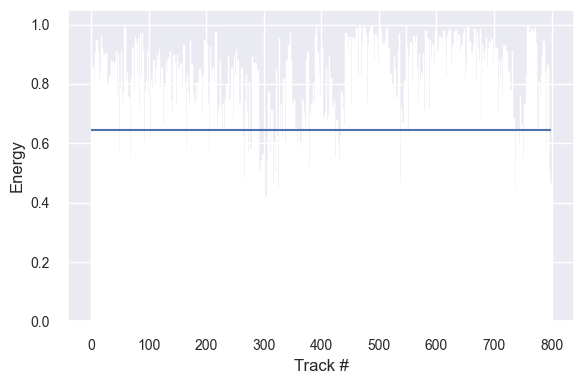

In [75]:
inspect(df, 'energy',6)

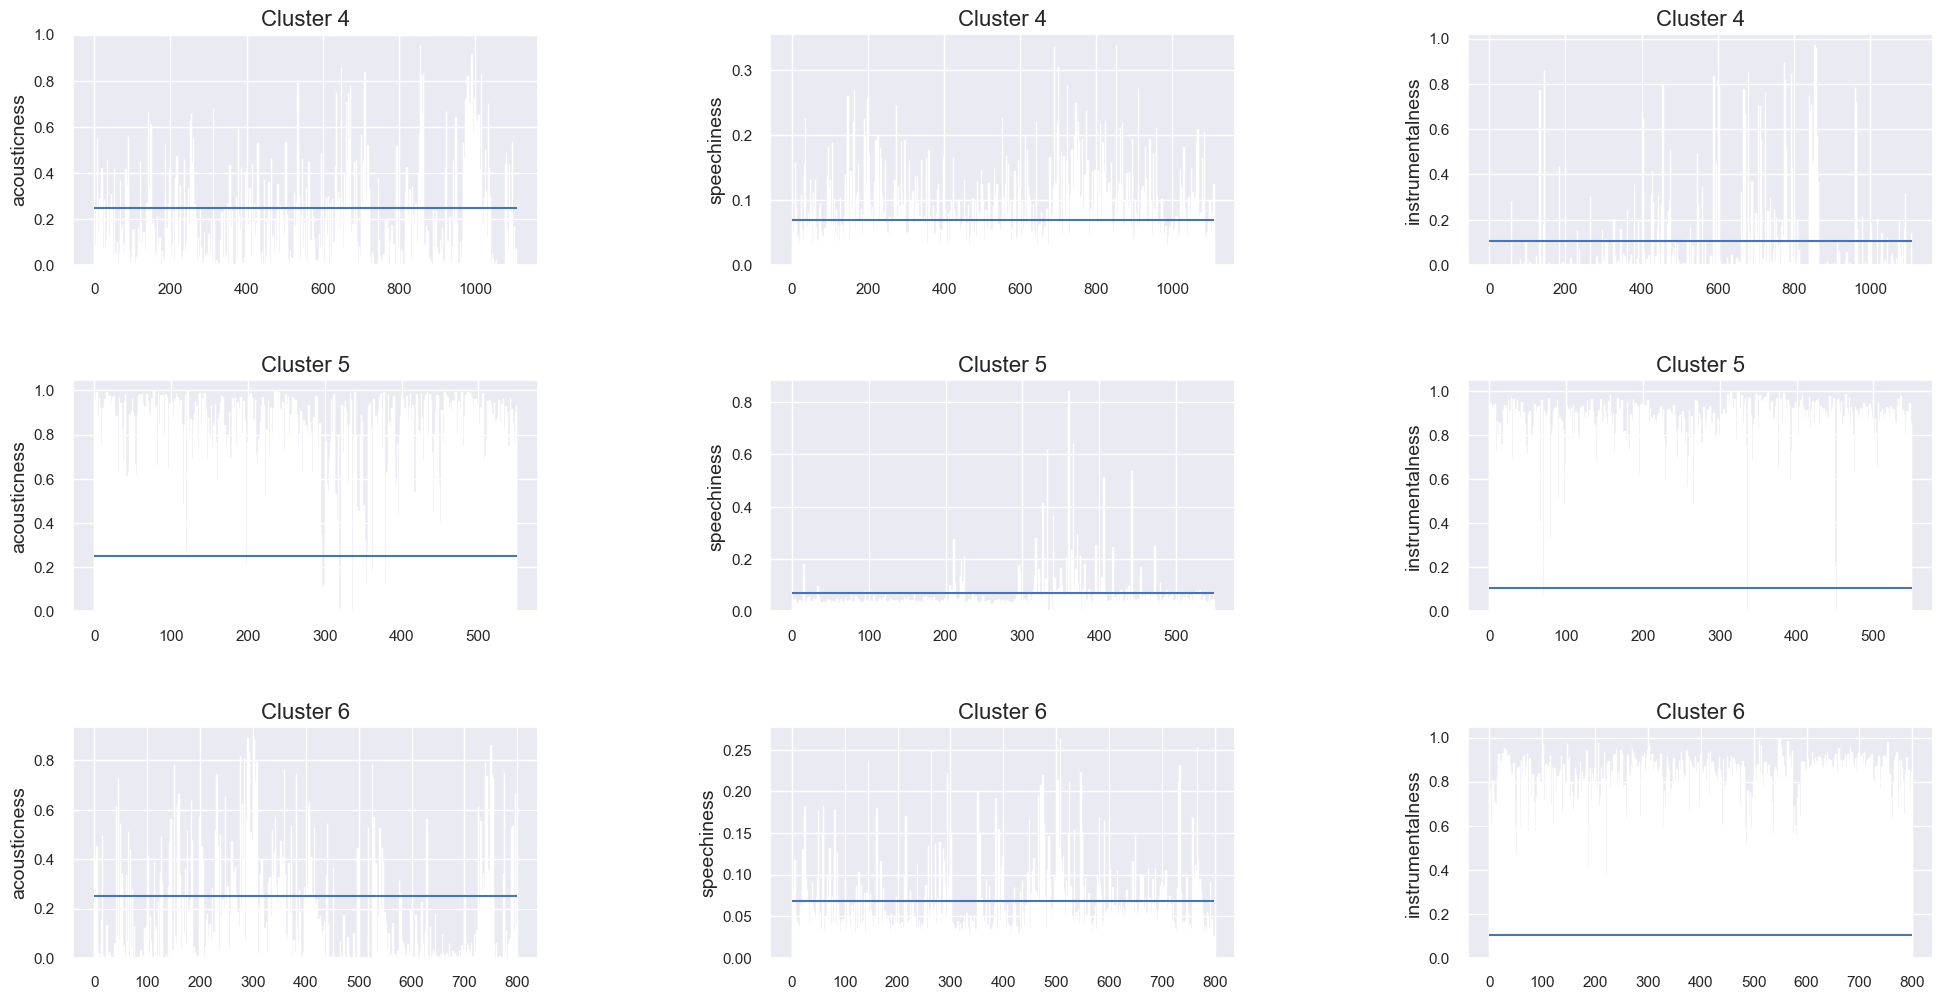

In [82]:
clusters = [4, 5, 6]
features = ["acousticness", "speechiness", "instrumentalness"]
colors = ['tab:green', 'tab:olive', 'tab:cyan']
dim = len(clusters)

fig, axes = plt.subplots(dim, dim, figsize=(24, 12))
i = 0
test_cluster = df.loc[df['Cluster'] == clusters[0]]
for ax in (axes.flatten()):
    if i % dim == 0 and i != 0:
        test_cluster = df.loc[df['Cluster'] == clusters[i // dim]]
    col = features[i % dim]
    y = test_cluster[col]
    x = [i for i in range(len(y))]
    ax.bar(x, y, color=colors[i//dim])
    ax.set_ylabel(col, fontsize=14)
    ax.set_title("Cluster " + str(clusters[i // dim]), fontsize=16)
    ax.hlines(np.mean(df[col]), 0, len(y))
    plt.subplots_adjust(wspace=.5, hspace=.5)
    i += 1
    
fig.savefig("./visualizations/cluster_feature_bar_charts_dim_3.png")

In [77]:
df['Cluster'].value_counts()

2    4283
0    2552
3    2285
4    1110
6     799
1     559
5     550
Name: Cluster, dtype: int64

In [76]:
preview = df.loc[df['Cluster'] == 1]
print(len(preview))
preview.head(n=50)

559


,name,artist,track_URI,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,playlist,Cluster
49,Shake It Off,Taylor Swift,spotify:track:5xTtaWoae3wi06K5WfVUUH,0.05610,0.647,0.785,0.000000,0.1480,-5.414,0.165,160.015,0.9430,The Longest Playlist on Spotify® (Official),1
62,Sorry Not Sorry,Demi Lovato,spotify:track:3Du2K5dLzmduCNp6uwuaL0,0.02230,0.702,0.635,0.000000,0.2830,-6.917,0.265,144.004,0.8730,The Longest Playlist on Spotify® (Official),1
90,Trumpets,Jason Derulo,spotify:track:5KONnBIQ9LqCxyeSPin26k,0.55500,0.635,0.691,0.000000,0.0970,-4.862,0.258,82.142,0.6380,The Longest Playlist on Spotify® (Official),1
109,Single Ladies (Put a Ring on It),Beyoncé,spotify:track:5R9a4t5t5O0IsznsrKPVro,0.03830,0.426,0.584,0.000000,0.1880,-5.293,0.296,193.437,0.2720,The Longest Playlist on Spotify® (Official),1
163,Sunday Candy,Donnie Trumpet & The Social Experiment,spotify:track:6fTdcGsjxlAD9PSkoPaLMX,0.53000,0.511,0.596,0.000000,0.0798,-6.560,0.224,158.063,0.5540,The Longest Playlist on Spotify® (Official),1
170,My Love (feat. T.I.),Justin Timberlake,spotify:track:4NeOWqHmlrGRuBvsLJC9rL,0.27700,0.771,0.680,0.000012,0.6820,-5.881,0.224,119.952,0.8080,The Longest Playlist on Spotify® (Official),1
220,Love Yourself,Justin Bieber,spotify:track:50kpGaPAhYJ3sGmk6vplg0,0.83500,0.609,0.378,0.000000,0.2800,-9.828,0.438,100.418,0.5150,The Longest Playlist on Spotify® (Official),1
235,No Pressure,Justin Bieber,spotify:track:10SDxx0CFWGqgVVBeX22TP,0.12100,0.644,0.595,0.000000,0.2790,-6.877,0.215,148.889,0.5540,The Longest Playlist on Spotify® (Official),1
248,Like A G6,Far East Movement,spotify:track:5AyL2kgLtTWEu3qO3B9SqK,0.00676,0.435,0.837,0.000000,0.1170,-8.126,0.449,124.913,0.7780,The Longest Playlist on Spotify® (Official),1
276,Wiggle (feat. Snoop Dogg),Jason Derulo,spotify:track:2sLwPnIP3CUVmIuHranJZU,0.08020,0.697,0.621,0.000000,0.1620,-6.886,0.250,81.946,0.7210,The Longest Playlist on Spotify® (Official),1


In [90]:
preview.loc[preview['artist']=="Drake"]

,name,artist,track_URI,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,playlist,Cluster
693,Jumpman,Drake,spotify:track:27GmP9AWRs744SzKcpJsTZ,0.0559,0.852,0.553,0.000000,0.3320,-7.286,0.187,142.079,0.656,The Longest Playlist on Spotify® (Official),1
976,Fake Love,Drake,spotify:track:343YBumqHu19cGoGARUTsd,0.1050,0.928,0.481,0.000000,0.1760,-9.350,0.287,134.007,0.613,The Longest Playlist on Spotify® (Official),1
1810,Fake Love,Drake,spotify:track:6NMNgWgEAzde5M8U3lc6FN,0.1820,0.924,0.543,0.000000,0.1030,-7.474,0.298,133.907,0.736,The Longest Playlist on Spotify® (Official),1
2732,Take Care,Drake,spotify:track:124NFj84ppZ5pAxTuVQYCQ,0.0267,0.629,0.515,0.000012,0.0888,-10.358,0.265,121.845,0.299,The Longest Playlist on Spotify® (Official),1
5050,Best I Ever Had,Drake,spotify:track:3fyMH1t6UPeR5croea9PrR,0.2190,0.427,0.861,0.000000,0.2770,-4.874,0.376,161.776,0.581,The Longest Playlist on Spotify® (Official),1
9623,I'm Upset,Drake,spotify:track:3qN5qMTKyEEmiTZD38BNTT,0.2790,0.899,0.586,0.000000,0.0836,-7.866,0.343,150.002,0.492,The Longest Playlist on Spotify® (Official),1


In [87]:
df1 = df.loc[df['Cluster'] == 0]
df1['artist'].value_counts()[:10]

Taylor Swift           47
Lacuna Coil            47
Flyleaf                33
The Killers            24
Muse                   24
Green Day              23
Metallica              21
The Neighbourhood      20
Coldplay               18
Panic! At The Disco    17
Name: artist, dtype: int64